In [10]:
# Install pytesseract and OpenCV
!pip install pytesseract opencv-python-headless

# Install Tesseract OCR
!apt-get update
!apt-get install -y tesseract-ocr


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]                             
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]                           
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]                
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]                           
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]           
Get:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease                
Get:10 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [66.7 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 

In [11]:
!pip install ultralytics


In [12]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow


In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YoLauAJhFR1JmWW6KisI")
project = rf.workspace("chiggsseethat").project("license-plate-detection-vpndw-xzs9y")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Detection-1 in yolov8:: 100%|██████████| 986/986 [00:00<00:00, 5887.79it/s]


In [14]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # 'n' is for nano, you can switch to 's', 'm', or 'l' for larger models

# Train the model
model.train(data='/kaggle/working/License-Plate-Detection-1/data.yaml', epochs=60, imgsz=640)


100%|██████████| 6.25M/6.25M [00:00<00:00, 226MB/s]


Ultralytics 8.3.74 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/License-Plate-Detection-1/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

100%|██████████| 755k/755k [00:00<00:00, 43.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 180MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/License-Plate-Detection-1/train/labels... 426 images, 0 backgrounds, 0 corrupt: 100%|██████████| 426/426 [00:00<00:00, 1039.85it/s]

train: New cache created: /kaggle/working/License-Plate-Detection-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 203, len(boxes) = 624. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.3 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /kaggle/working/License-Plate-Detection-1/valid/labels... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<00:00, 1167.81it/s]

val: New cache created: /kaggle/working/License-Plate-Detection-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 16, len(boxes) = 50. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      2.37G      1.317      2.516      1.605         22        640: 100%|██████████| 27/27 [00:06<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         37         50          1     0.0578      0.237       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      2.32G      1.368      1.899       1.61         29        640: 100%|██████████| 27/27 [00:04<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all         37         50       0.52      0.174      0.175     0.0619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      2.32G      1.378      1.786      1.594         30        640: 100%|██████████| 27/27 [00:04<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]

                   all         37         50      0.335       0.18      0.123     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      2.32G      1.354      1.669      1.583         37        640: 100%|██████████| 27/27 [00:04<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         37         50      0.384      0.337       0.24     0.0937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      2.32G      1.372      1.585      1.607         20        640: 100%|██████████| 27/27 [00:04<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all         37         50      0.518       0.18       0.21     0.0983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      2.33G      1.409      1.546      1.643         29        640: 100%|██████████| 27/27 [00:04<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all         37         50      0.525       0.54      0.434      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      2.32G      1.344      1.482      1.573         35        640: 100%|██████████| 27/27 [00:04<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         37         50      0.513        0.6      0.481      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      2.34G      1.338      1.407      1.547         22        640: 100%|██████████| 27/27 [00:04<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.74it/s]

                   all         37         50      0.298      0.432      0.337      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      2.32G      1.258      1.303      1.521         23        640: 100%|██████████| 27/27 [00:04<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         37         50      0.664        0.6      0.616      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      2.33G      1.323      1.295      1.545         28        640: 100%|██████████| 27/27 [00:04<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all         37         50       0.71      0.684      0.651      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      2.32G      1.283      1.256      1.533         28        640: 100%|██████████| 27/27 [00:04<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]

                   all         37         50      0.903       0.38      0.569      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      2.34G      1.222      1.179      1.507         36        640: 100%|██████████| 27/27 [00:04<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all         37         50      0.849       0.54      0.664      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      2.32G      1.253      1.187      1.473         25        640: 100%|██████████| 27/27 [00:04<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         37         50       0.69      0.578      0.595      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      2.33G      1.175       1.12      1.426         30        640: 100%|██████████| 27/27 [00:04<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]

                   all         37         50      0.806       0.68      0.681      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      2.32G      1.171      1.056      1.388         30        640: 100%|██████████| 27/27 [00:04<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all         37         50      0.756       0.56      0.625      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      2.34G       1.16      1.102      1.426         30        640: 100%|██████████| 27/27 [00:04<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all         37         50      0.825       0.62      0.691      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      2.32G      1.132      1.033      1.404         28        640: 100%|██████████| 27/27 [00:04<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         37         50       0.88       0.64      0.673      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      2.33G      1.129      1.067      1.378         18        640: 100%|██████████| 27/27 [00:04<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         37         50      0.823       0.68      0.702      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      2.32G      1.149      1.091      1.399         25        640: 100%|██████████| 27/27 [00:04<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all         37         50      0.853      0.697      0.715      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      2.34G      1.112      1.028      1.405         36        640: 100%|██████████| 27/27 [00:04<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         37         50      0.714       0.74      0.715      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      2.32G      1.101     0.9704      1.381         32        640: 100%|██████████| 27/27 [00:04<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         37         50       0.73       0.74      0.745      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      2.33G      1.018     0.8985      1.312         24        640: 100%|██████████| 27/27 [00:04<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         37         50      0.811       0.68      0.754       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      2.32G      1.049     0.8985      1.327         23        640: 100%|██████████| 27/27 [00:04<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]

                   all         37         50      0.881        0.7      0.738      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      2.34G      1.008     0.8545      1.315         32        640: 100%|██████████| 27/27 [00:04<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         37         50      0.854       0.68      0.725      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      2.32G      1.008     0.8765      1.304         33        640: 100%|██████████| 27/27 [00:04<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all         37         50      0.776       0.76      0.754      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      2.33G     0.9812     0.8545      1.305         25        640: 100%|██████████| 27/27 [00:04<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]

                   all         37         50      0.944       0.72      0.776      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      2.32G      1.004     0.8743       1.29         38        640: 100%|██████████| 27/27 [00:04<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all         37         50      0.782       0.72      0.648      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      2.34G     0.9658     0.8136      1.279         50        640: 100%|██████████| 27/27 [00:04<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all         37         50      0.837       0.74      0.759       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      2.32G     0.9343     0.8011       1.26         23        640: 100%|██████████| 27/27 [00:04<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.08it/s]

                   all         37         50      0.778       0.68      0.738      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      2.33G     0.9251     0.7777      1.289         32        640: 100%|██████████| 27/27 [00:04<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all         37         50      0.864       0.62      0.686      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      2.32G     0.9058     0.7747      1.243         21        640: 100%|██████████| 27/27 [00:04<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         37         50      0.816       0.74      0.762      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      2.34G     0.8985     0.7512      1.233         32        640: 100%|██████████| 27/27 [00:04<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         37         50      0.856       0.72      0.785      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      2.32G     0.9111     0.7461       1.25         30        640: 100%|██████████| 27/27 [00:04<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]

                   all         37         50      0.841       0.76      0.781      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      2.33G     0.8871     0.7512      1.216         29        640: 100%|██████████| 27/27 [00:04<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]

                   all         37         50      0.816       0.72      0.772      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      2.32G     0.8739     0.7356      1.229         17        640: 100%|██████████| 27/27 [00:04<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.45it/s]

                   all         37         50      0.854       0.82      0.797      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      2.34G     0.8671     0.7262      1.196         23        640: 100%|██████████| 27/27 [00:04<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all         37         50      0.882       0.64      0.714      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      2.32G     0.8202     0.7214      1.191         23        640: 100%|██████████| 27/27 [00:04<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]

                   all         37         50      0.858      0.727      0.773      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      2.33G     0.8424     0.7184      1.198         25        640: 100%|██████████| 27/27 [00:04<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.65it/s]

                   all         37         50      0.973       0.72       0.78      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      2.32G     0.8536     0.6932      1.188         36        640: 100%|██████████| 27/27 [00:04<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.71it/s]

                   all         37         50      0.795       0.72      0.725      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      2.34G     0.8459     0.6942      1.175         26        640: 100%|██████████| 27/27 [00:04<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         37         50      0.855       0.72      0.749      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      2.32G     0.8128     0.6684      1.182         39        640: 100%|██████████| 27/27 [00:04<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.46it/s]

                   all         37         50      0.837       0.74       0.77      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      2.33G     0.8162       0.67      1.178         27        640: 100%|██████████| 27/27 [00:04<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all         37         50      0.878        0.8      0.799      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      2.32G     0.8196     0.6637      1.148         24        640: 100%|██████████| 27/27 [00:05<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]

                   all         37         50      0.897       0.76      0.786      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      2.34G     0.7736     0.6336      1.158         24        640: 100%|██████████| 27/27 [00:04<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         37         50      0.888      0.796      0.812      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      2.32G     0.7891      0.644      1.158         26        640: 100%|██████████| 27/27 [00:04<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all         37         50      0.888        0.7      0.752      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      2.33G      0.783     0.6147      1.139         36        640: 100%|██████████| 27/27 [00:04<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.91it/s]

                   all         37         50      0.832      0.794      0.787      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      2.32G     0.7304     0.6152      1.153         35        640: 100%|██████████| 27/27 [00:04<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all         37         50      0.832       0.82      0.785      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      2.34G     0.7278     0.6071       1.13         30        640: 100%|██████████| 27/27 [00:04<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         37         50      0.828       0.82      0.821      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      2.32G     0.7497     0.6023      1.121         25        640: 100%|██████████| 27/27 [00:04<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         37         50      0.887       0.84      0.823      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      2.33G     0.7128     0.5853      1.121         35        640: 100%|██████████| 27/27 [00:04<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]

                   all         37         50      0.845        0.8       0.81      0.557


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      2.32G     0.7005     0.5695      1.135         11        640: 100%|██████████| 27/27 [00:05<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         37         50      0.883       0.78      0.821      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      2.34G     0.6606      0.531      1.086         15        640: 100%|██████████| 27/27 [00:04<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all         37         50      0.861       0.78      0.781      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      2.32G     0.6481      0.496      1.085         11        640: 100%|██████████| 27/27 [00:04<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all         37         50      0.882       0.78      0.787      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      2.33G     0.6132     0.4912      1.049         22        640: 100%|██████████| 27/27 [00:04<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]

                   all         37         50      0.832       0.82      0.788      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      2.33G     0.5995     0.4756      1.046         15        640: 100%|██████████| 27/27 [00:04<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]

                   all         37         50      0.923       0.76      0.797      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      2.34G     0.5918     0.4499       1.05         10        640: 100%|██████████| 27/27 [00:04<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.09it/s]

                   all         37         50      0.929       0.78      0.803      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      2.33G     0.5951     0.4337       1.04         13        640: 100%|██████████| 27/27 [00:04<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         37         50      0.928      0.774      0.802      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      2.33G     0.5808     0.4553      1.045         11        640: 100%|██████████| 27/27 [00:04<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all         37         50      0.918       0.76      0.799      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      2.32G     0.5563     0.4381      1.016         16        640: 100%|██████████| 27/27 [00:04<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.87it/s]

                   all         37         50      0.899        0.8        0.8      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      2.34G     0.5647     0.4354      1.032         16        640: 100%|██████████| 27/27 [00:04<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all         37         50      0.909        0.8      0.805      0.527



60 epochs completed in 0.099 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]


                   all         37         50      0.885       0.84      0.823      0.575


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x789265793700>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [15]:
!ls runs/detect/train*/weights/


best.pt  last.pt


In [16]:
from ultralytics import YOLO

model = YOLO('runs/detect/train/weights/best.pt')  # Load the trained model


In [17]:
results = model.predict('/kaggle/input/okokok/Plate_1711623405530_1711623405684.jpeg', save=True)  # Replace with your image path



image 1/1 /kaggle/input/okokok/Plate_1711623405530_1711623405684.jpeg: 384x640 2 licenseplates, 34.0ms
Speed: 2.3ms preprocess, 34.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


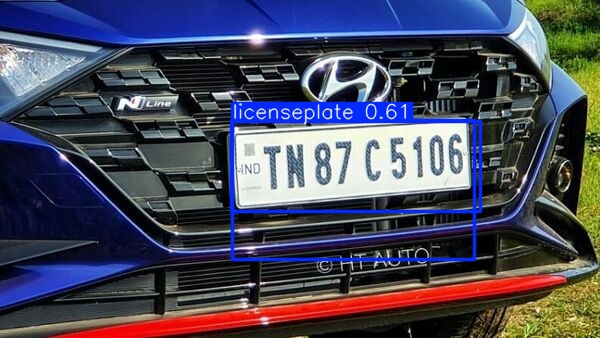

In [18]:
from IPython.display import Image, display
display(Image(filename='runs/detect/predict/Plate_1711623405530_1711623405684.jpg'))


In [19]:
results = model.predict('/kaggle/input/okokok/test_last.jpg', save=True)  # Replace with your image path



image 1/1 /kaggle/input/okokok/test_last.jpg: 448x640 1 licenseplate, 34.4ms
Speed: 2.6ms preprocess, 34.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


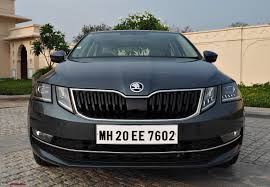

In [20]:
from IPython.display import Image, display
display(Image(filename='/kaggle/input/okokok/test_last.jpg'))

In [22]:
!yolo detect predict model=runs/detect/train/weights/best.pt source='/kaggle/input/okokok/test_last.jpg' conf=0.25

Ultralytics 8.3.74 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /kaggle/input/okokok/test_last.jpg: 448x640 1 licenseplate, 34.0ms
Speed: 6.5ms preprocess, 34.0ms inference, 165.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


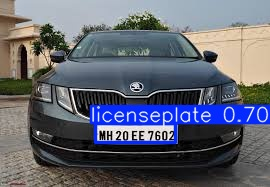

In [23]:
from IPython.display import Image, display
display(Image(filename='runs/detect/predict2/test_last.jpg'))

In [24]:
from PIL import Image
import cv2

# Load the image
img = cv2.imread('runs/detect/predict2/test_last.jpg')

# Read YOLO prediction details
results = model('/kaggle/input/okokok/test_last.jpg')  # Ensure 'model' is your trained YOLO model
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()  # Get bounding box coordinates

# Crop and save license plate
for i, box in enumerate(boxes):
    x1, y1, x2, y2 = map(int, box)
    cropped_plate = img[y1:y2, x1:x2]
    cv2.imwrite(f'cropped_plate_{i}.jpg', cropped_plate)



image 1/1 /kaggle/input/okokok/test_last.jpg: 448x640 1 licenseplate, 11.6ms
Speed: 3.1ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


In [25]:
import pytesseract
from PIL import Image

# Read the cropped plate
cropped_image = Image.open('cropped_plate_0.jpg')

# Perform OCR
plate_number = pytesseract.image_to_string(cropped_image, config='--psm 8')
print("License Plate Number:", plate_number)


License Plate Number: MH 20 EE 7602



In [27]:
from ultralytics import YOLO
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the trained YOLO model
model = YOLO('runs/detect/train/weights/best.pt')  # Replace with your trained model path

# Function to detect license plates with dynamic confidence threshold
def detect_license_plate(image_path, min_conf=0.3, max_conf=0.7):
    img = Image.open(image_path)
    results = model(img)

    # Dynamic confidence adjustment
    for conf_threshold in np.linspace(min_conf, max_conf, num=5):
        filtered_results = [box for result in results for box in result.boxes if box.conf.cpu().numpy() >= conf_threshold]
        if filtered_results:
            print(f"Detected with confidence threshold: {conf_threshold}")
            break

    # Plotting the image with bounding boxes
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    ax = plt.gca()
    
    for box in filtered_results:
        xyxy = box.xyxy.cpu().numpy()[0]  # Bounding box coordinates
        confidence = box.conf.cpu().numpy()[0]
        label = f'License Plate: {confidence:.2f}'

        # Drawing bounding box
        rect = plt.Rectangle((xyxy[0], xyxy[1]), xyxy[2]-xyxy[0], xyxy[3]-xyxy[1],
                             edgecolor='red', facecolor='none', linewidth=2)
        ax.add_patch(rect)
        ax.text(xyxy[0], xyxy[1]-10, label, color='red', fontsize=12, weight='bold')

    plt.axis('off')
    plt.show()



0: 448x640 1 licenseplate, 7.7ms
Speed: 1.7ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Detected with confidence threshold: 0.3


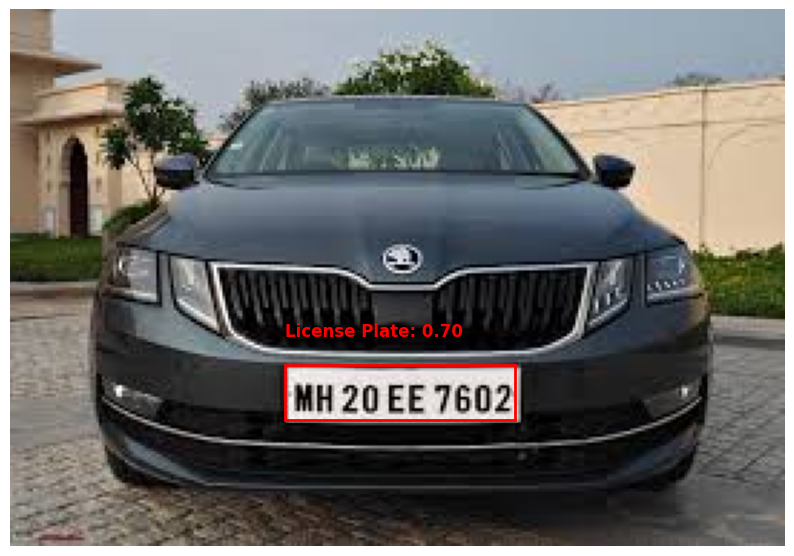

In [28]:
detect_license_plate('/kaggle/input/okokok/test_last.jpg')


0: 640x640 2 licenseplates, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Detected with confidence threshold: 0.3


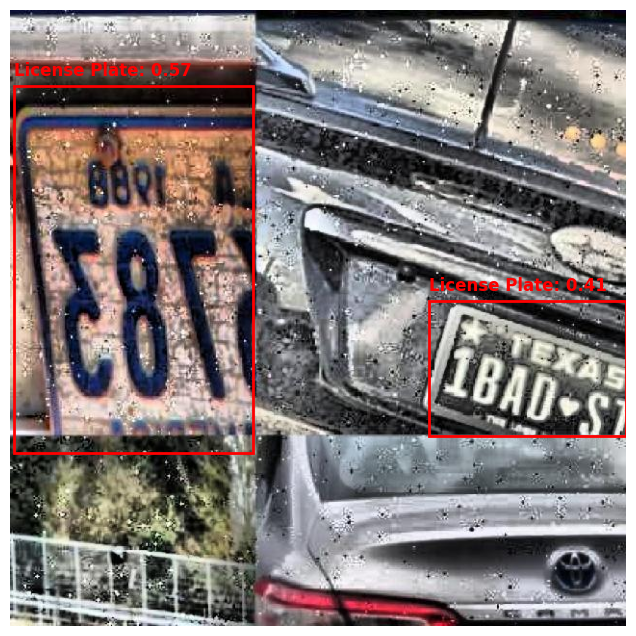

In [29]:
detect_license_plate('/kaggle/working/License-Plate-Detection-1/test/images/130_0047_jpg.rf.14201752a0b66076a5e7153d7ba85a42.jpg')


0: 640x640 1 licenseplate, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Detected with confidence threshold: 0.3


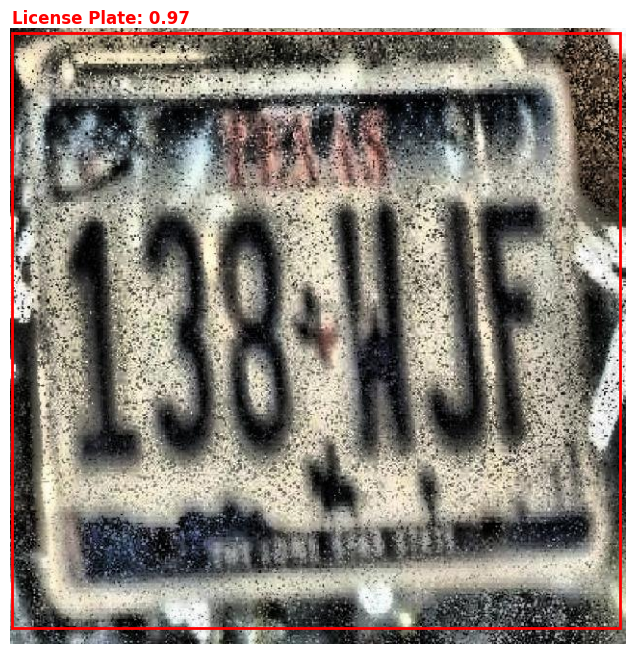

In [30]:
detect_license_plate('/kaggle/working/License-Plate-Detection-1/test/images/d80c3ffa7f610438_jpg.rf.a9d27729cb640afcd45478dbdc9a7b35.jpg')


0: 640x640 1 licenseplate, 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Detected with confidence threshold: 0.3


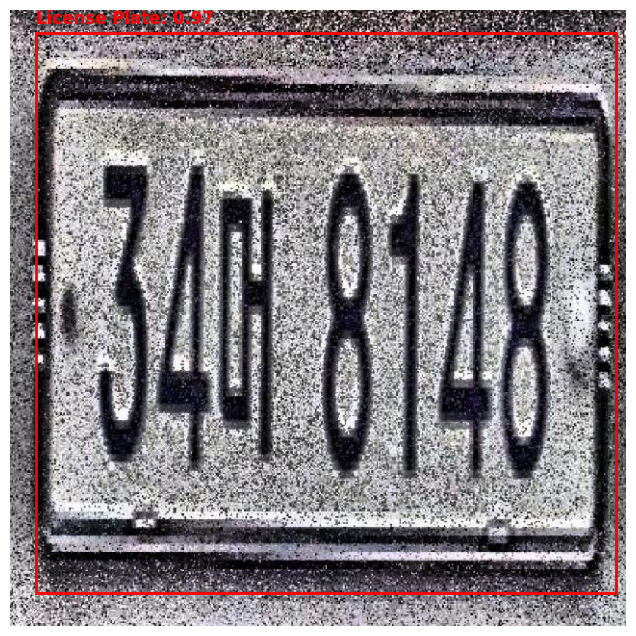

In [31]:
detect_license_plate('/kaggle/working/License-Plate-Detection-1/test/images/f7e0c922ddf7617d_jpg.rf.7216263e2c0453290b31ecda21e04dcd.jpg')


0: 448x640 1 licenseplate, 8.4ms
Speed: 2.1ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


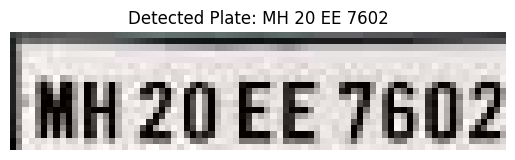

Detected Plate Number: MH 20 EE 7602


In [32]:
# Function to detect and read license plate
def detect_and_read_plate(image_path):
    image = cv2.imread(image_path)
    results = model(image)
    
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Get bounding boxes
        
        for box in boxes:
            x1, y1, x2, y2 = map(int, box[:4])
            plate_img = image[y1:y2, x1:x2]
            
            # OCR to read text from cropped plate image
            plate_text = pytesseract.image_to_string(plate_img, config='--psm 8')  
            
            # Display detected plate
            plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
            plt.title(f'Detected Plate: {plate_text.strip()}')
            plt.axis('off')
            plt.show()
            
            return plate_text.strip()

# Test with an image
plate_number = detect_and_read_plate('/kaggle/input/okokok/test_last.jpg')
print("Detected Plate Number:", plate_number)



0: 640x640 1 licenseplate, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


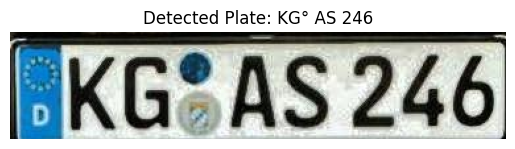

Detected Plate Number: KG° AS 246


In [33]:
# Function to detect and read license plate
def detect_and_read_plate(image_path):
    image = cv2.imread(image_path)
    results = model(image)
    
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Get bounding boxes
        
        for box in boxes:
            x1, y1, x2, y2 = map(int, box[:4])
            plate_img = image[y1:y2, x1:x2]
            
            # OCR to read text from cropped plate image
            plate_text = pytesseract.image_to_string(plate_img, config='--psm 8')  
            
            # Display detected plate
            plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
            plt.title(f'Detected Plate: {plate_text.strip()}')
            plt.axis('off')
            plt.show()
            
            return plate_text.strip()

# Test with an image
plate_number = detect_and_read_plate('/kaggle/working/License-Plate-Detection-1/test/images/d_license_plate_234_jpg.rf.96a45046f191649e72557e5c3000a40b.jpg')
print("Detected Plate Number:", plate_number)



0: 448x640 1 licenseplate, 6.4ms
Speed: 1.5ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


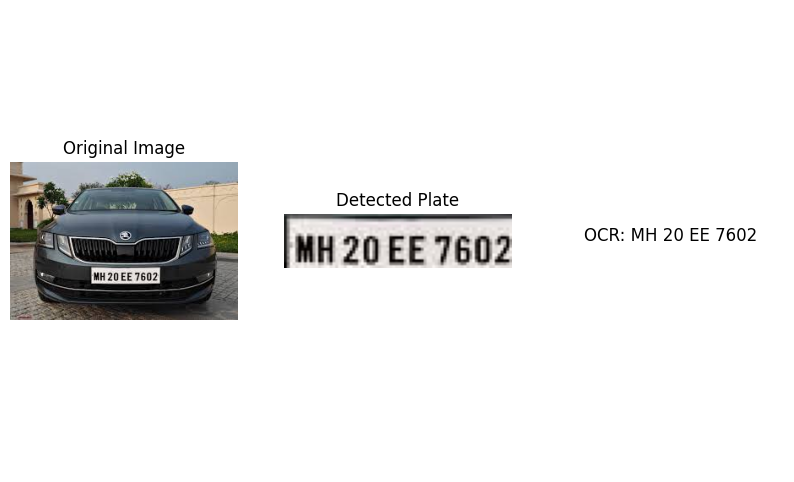

🚗 Vehicle Report for MH 20 EE 7602:
Owned by Parveen Kumar, the Skoda (2013) is flagged as 'Stolen' in our records.


In [37]:
import cv2
import pytesseract
from ultralytics import YOLO
import random
import matplotlib.pyplot as plt

# Vehicle database
vehicle_db = {
    "DL8CAF1234": {"Owner": "Rohit Sharma", "Model": "Honda City", "Year": "2019", "Status": "Active"},
    "MH12DE5678": {"Owner": "Virat Kohli", "Model": "Hyundai Creta", "Year": "2021", "Status": "Stolen"},
    "KA05MN4321": {"Owner": "MS Dhoni", "Model": "Toyota Fortuner", "Year": "2018", "Status": "Active"},
    "MH 20 EE 7602":{"Owner": "Parveen Kumar","Model":"Skoda","Year":"2013","Status":"Stolen"}


}

# Paraphrasing Function
def paraphrase_details(plate, details):
    templates = [
        f"This {details['Model']} belongs to {details['Owner']} and has been cruising since {details['Year']}. The current status is '{details['Status']}'.",
        f"Registered under {details['Owner']}, this {details['Model']} hit the roads in {details['Year']}. Status? It's '{details['Status']}'.",
        f"Say hello to {details['Owner']}'s {details['Model']} from {details['Year']}—currently marked as '{details['Status']}'.",
        f"Owned by {details['Owner']}, the {details['Model']} ({details['Year']}) is flagged as '{details['Status']}' in our records."
    ]
    return random.choice(templates)

# Load YOLO model
model = YOLO('runs/detect/train/weights/best.pt')

# Full Pipeline
def process_image(image_path):
    image = cv2.imread(image_path)
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Detect license plate
    results = model(image)
    plate_number = None

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()

        for box in boxes:
            x1, y1, x2, y2 = map(int, box[:4])
            plate_img = image[y1:y2, x1:x2]

            # Show detected plate
            plt.subplot(1, 3, 2)
            plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
            plt.title('Detected Plate')
            plt.axis('off')

            # OCR
            plate_number = pytesseract.image_to_string(plate_img, config='--psm 8').strip()

            plt.subplot(1, 3, 3)
            plt.text(0.5, 0.5, f'OCR: {plate_number}', fontsize=12, ha='center')
            plt.axis('off')

    plt.show()

    # Vehicle Info with Paraphrasing
    if plate_number and plate_number in vehicle_db:
        vehicle_info = vehicle_db[plate_number]
        paraphrased = paraphrase_details(plate_number, vehicle_info)
        print(f"🚗 Vehicle Report for {plate_number}:\n{paraphrased}")
    else:
        print(f"❌ No vehicle data found for: {plate_number}")

# Test the pipeline
process_image('/kaggle/input/okokok/test_last.jpg')



0: 352x640 1 licenseplate, 37.9ms
Speed: 2.5ms preprocess, 37.9ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)


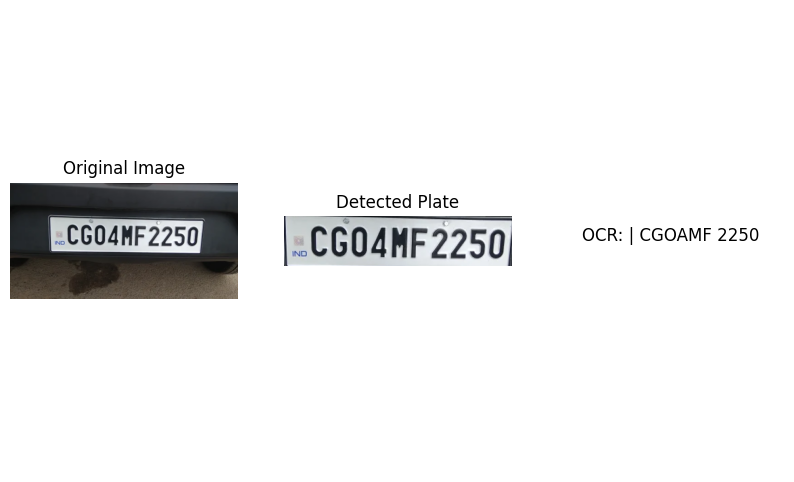

❌ No vehicle data found for: | CGOAMF 2250


In [38]:
process_image('/kaggle/input/system-test-images/test_images/product-500x500.webp')


0: 416x640 1 licenseplate, 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


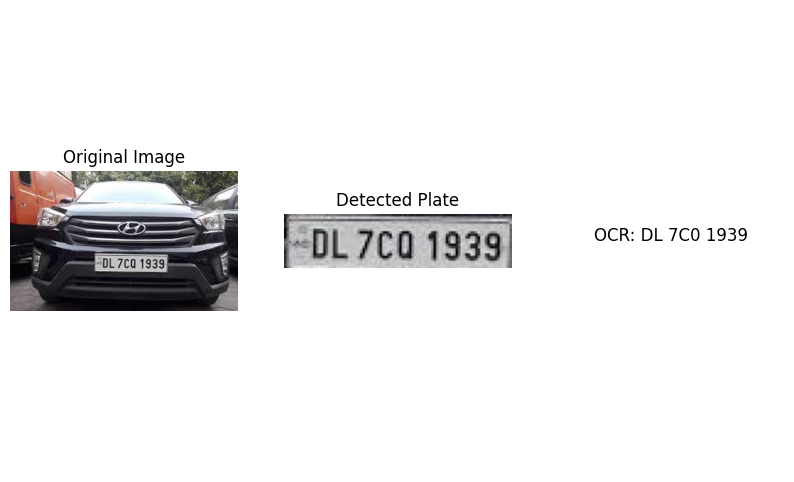

❌ No vehicle data found for: DL 7C0 1939


In [39]:
process_image('/kaggle/input/system-test-images/test_images/creta.jpg')


0: 480x640 1 licenseplate, 36.2ms
Speed: 2.3ms preprocess, 36.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


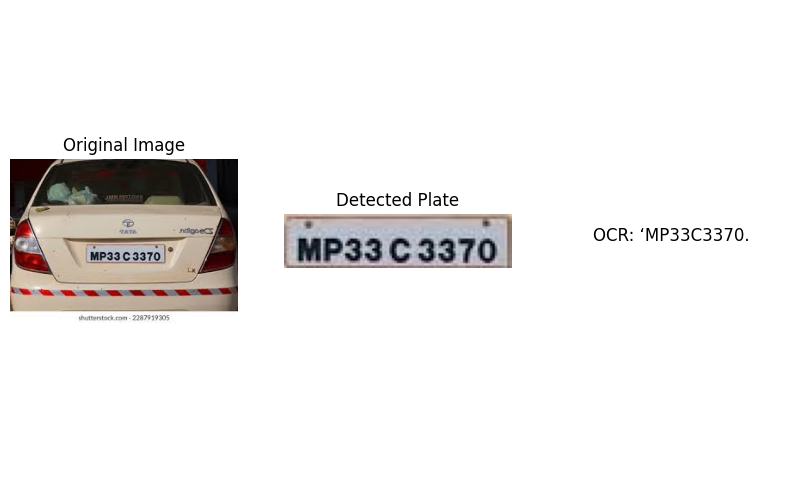

❌ No vehicle data found for: ‘MP33C3370.


In [41]:
process_image('/kaggle/input/latest/test_images/indigo.jpg')

In [43]:
!mkdir -p /kaggle/working/model_backup
!cp runs/detect/train/weights/best.pt /kaggle/working/model_backup/


In [46]:
!zip -r /kaggle/working/model_backup.zip /kaggle/working/model_backup/


  adding: kaggle/working/model_backup/ (stored 0%)
  adding: kaggle/working/model_backup/best.pt (deflated 10%)


In [47]:
!cp /kaggle/working/model_backup/best.pt /kaggle/working/best.pt



0: 448x640 1 licenseplate, 12.9ms
Speed: 2.0ms preprocess, 12.9ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


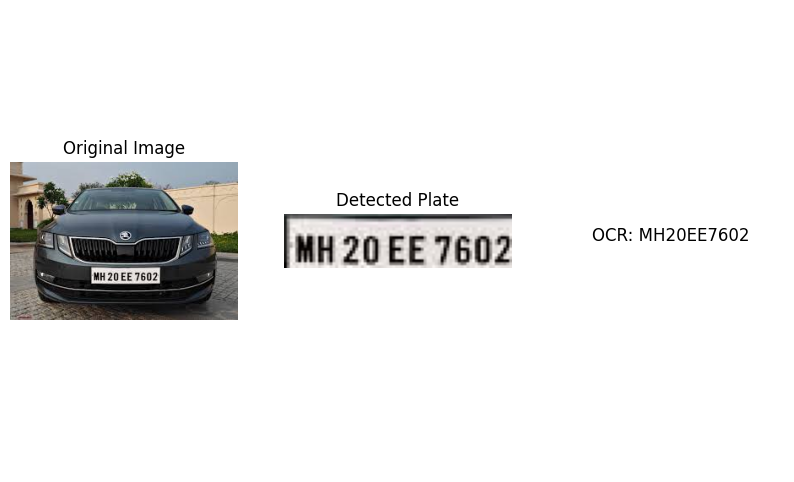

🚗 Vehicle Report for MH20EE7602:
Owned by Parveen Kumar, the Skoda (2013) is flagged as 'Active' in our records.


In [53]:
import cv2
import pytesseract
from ultralytics import YOLO
import random
import re
import matplotlib.pyplot as plt

# Vehicle database
vehicle_db = {
    "DL8CAF1234": {"Owner": "Rohit Sharma", "Model": "Honda City", "Year": "2019", "Status": "Active"},
    "MH12DE5678": {"Owner": "Virat Kohli", "Model": "Hyundai Creta", "Year": "2021", "Status": "Stolen"},
    "KA05MN4321": {"Owner": "MS Dhoni", "Model": "Toyota Fortuner", "Year": "2018", "Status": "Active"},
    "MH20EE7602": {"Owner": "Parveen Kumar", "Model": "Skoda", "Year": "2013", "Status": "Active"}
}

# Paraphrasing Function
def paraphrase_details(plate, details):
    templates = [
        f"This {details['Model']} belongs to {details['Owner']} and has been cruising since {details['Year']}. The current status is '{details['Status']}'.",
        f"Registered under {details['Owner']}, this {details['Model']} hit the roads in {details['Year']}. Status? It's '{details['Status']}'.",
        f"Say hello to {details['Owner']}'s {details['Model']} from {details['Year']}—currently marked as '{details['Status']}'.",
        f"Owned by {details['Owner']}, the {details['Model']} ({details['Year']}) is flagged as '{details['Status']}' in our records."
    ]
    return random.choice(templates)

# Load YOLO model
model = YOLO('runs/detect/train/weights/best.pt')

# OCR Cleaning Function
def clean_plate_number(plate_number):
    plate_number = plate_number.upper()                      # Convert to uppercase
    plate_number = re.sub(r'[^A-Z0-9]', '', plate_number)   # Remove non-alphanumeric characters
    plate_number = plate_number.replace(' ', '')            # Remove spaces
    return plate_number

# Full Pipeline
def process_image(image_path):
    image = cv2.imread(image_path)
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Detect license plate
    results = model(image)
    plate_number = None

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()

        for box in boxes:
            x1, y1, x2, y2 = map(int, box[:4])
            plate_img = image[y1:y2, x1:x2]

            # Preprocess for better OCR
            gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            denoised = cv2.fastNlMeansDenoising(thresh, h=30)

            # OCR
            raw_plate_number = pytesseract.image_to_string(denoised, config='--psm 8').strip()
            plate_number = clean_plate_number(raw_plate_number)

            # Show detected plate
            plt.subplot(1, 3, 2)
            plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
            plt.title('Detected Plate')
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.text(0.5, 0.5, f'OCR: {plate_number}', fontsize=12, ha='center')
            plt.axis('off')

    plt.show()

    # Vehicle Info with Paraphrasing
    if plate_number and plate_number in vehicle_db:
        vehicle_info = vehicle_db[plate_number]
        paraphrased = paraphrase_details(plate_number, vehicle_info)
        print(f"🚗 Vehicle Report for {plate_number}:\n{paraphrased}")
    else:
        print(f"❌ No vehicle data found for: {plate_number}")

# Test the pipeline
process_image('/kaggle/input/latest/test_images/test_last.jpg')


In [54]:
!pip install python-Levenshtein fuzzywuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.2 MB/s eta 0:00:00:00:01



0: 416x640 1 licenseplate, 7.5ms
Speed: 1.8ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


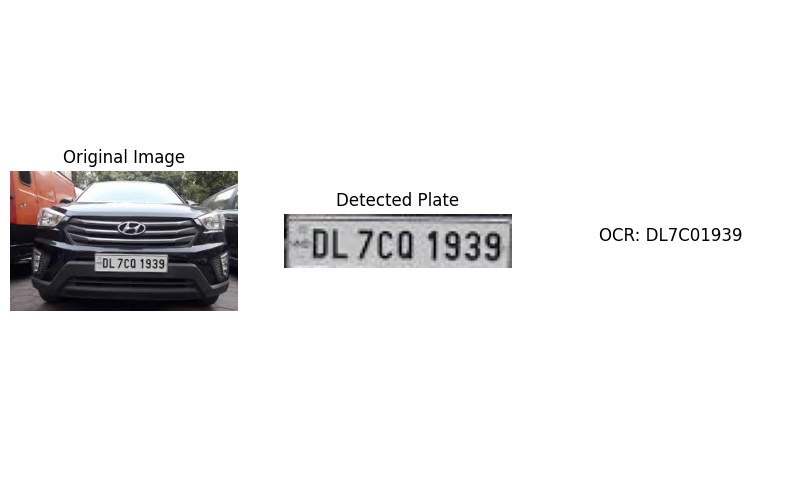

🚗 Vehicle Report for DL7C01939:
This Creta belongs to Ramesh Sagar and has been cruising since 2015. The current status is 'Stolen'.


In [56]:
import cv2
import pytesseract
from ultralytics import YOLO
from fuzzywuzzy import fuzz, process
import random
import matplotlib.pyplot as plt
import re

# Vehicle database
vehicle_db = {
    "DL8CAF1234": {"Owner": "Rohit Sharma", "Model": "Honda City", "Year": "2019", "Status": "Active"},
    "MH12DE5678": {"Owner": "Virat Kohli", "Model": "Hyundai Creta", "Year": "2021", "Status": "Stolen"},
    "KA05MN4321": {"Owner": "MS Dhoni", "Model": "Toyota Fortuner", "Year": "2018", "Status": "Active"},
    "MH20EE7602": {"Owner": "Parveen Kumar", "Model": "Skoda", "Year": "2013", "Status": "Active"},
    "DL7C01939" : {"Owner": "Ramesh Sagar","Model": "Creta","Year":"2015","Status": "Stolen"}
}

# Paraphrasing Function
def paraphrase_details(plate, details):
    templates = [
        f"This {details['Model']} belongs to {details['Owner']} and has been cruising since {details['Year']}. The current status is '{details['Status']}'.",
        f"Registered under {details['Owner']}, this {details['Model']} hit the roads in {details['Year']}. Status? It's '{details['Status']}'.",
        f"Say hello to {details['Owner']}'s {details['Model']} from {details['Year']}—currently marked as '{details['Status']}'.",
        f"Owned by {details['Owner']}, the {details['Model']} ({details['Year']}) is flagged as '{details['Status']}' in our records."
    ]
    return random.choice(templates)

# License Plate Correction
def correct_plate(ocr_output, db_keys):
    cleaned_plate = re.sub(r'[^A-Za-z0-9]', '', ocr_output)  # Remove spaces and special characters
    best_match, score = process.extractOne(cleaned_plate, db_keys, scorer=fuzz.ratio)
    return best_match if score >= 70 else cleaned_plate  # Accept match if score >= 70

# Load YOLO model
model = YOLO('runs/detect/train/weights/best.pt')

# Full Pipeline
def process_image(image_path):
    image = cv2.imread(image_path)
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Detect license plate
    results = model(image)
    plate_number = None

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()

        for box in boxes:
            x1, y1, x2, y2 = map(int, box[:4])
            plate_img = image[y1:y2, x1:x2]

            # Show detected plate
            plt.subplot(1, 3, 2)
            plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
            plt.title('Detected Plate')
            plt.axis('off')

            # OCR
            ocr_output = pytesseract.image_to_string(plate_img, config='--psm 8').strip()
            corrected_plate = correct_plate(ocr_output, vehicle_db.keys())

            plt.subplot(1, 3, 3)
            plt.text(0.5, 0.5, f'OCR: {corrected_plate}', fontsize=12, ha='center')
            plt.axis('off')

    plt.show()

    # Vehicle Info with Paraphrasing
    if corrected_plate in vehicle_db:
        vehicle_info = vehicle_db[corrected_plate]
        paraphrased = paraphrase_details(corrected_plate, vehicle_info)
        print(f"🚗 Vehicle Report for {corrected_plate}:\n{paraphrased}")
    else:
        print(f"❌ No vehicle data found for: {corrected_plate}")

# Test the pipeline
process_image('/kaggle/input/system-test-images/test_images/creta.jpg')
